<a href="https://colab.research.google.com/github/hijera/NN_colab_hw/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BD%D0%B0_%D1%82%D0%B5%D0%BC%D1%83_(%D1%81%D0%B8%D0%BD%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%BD%D0%BE%D0%B5_%D1%81%D0%BF%D0%B5%D0%BA%D1%82%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D0%B7%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5)_(SSA)_(%D0%92%D0%BB%D0%B0%D1%81%D0%BE%D0%B2_%D0%90%D0%BD%D1%82%D0%BE%D0%BD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1.   Проведите анализ с помощью SSA в любом из временных рядов с первого занятия.
2.   При желании можете воспользоваться своим временным рядом — работа, Kaggle и т. д.
3.   Посмотрите на результаты с разными длинами окон.
4.   Обязательно визуализируйте результаты аналогично материалу с занятия.


In [ ]:
#Возьмем ряд Monthly sales of company X
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
def plot_2d(m, title=""):
    plt.imshow(m)
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
def Hankelise(X):
  """
  Hankelises the matrix X, returning H(X).
  """
  L, K = X.shape
  transpose = False
  if L > K:
      # The Hankelisation below only works for matrices where L < K.
      # To Hankelise a L > K matrix, first swap L and K and tranpose X.
      # Set flag for HX to be transposed before returning.
      X = X.T
      L, K = K, L
      transpose = True

  HX = np.zeros((L,K))

  # I know this isn't very efficient...
  for m in range(L):
      for n in range(K):
          s = m+n
          if 0 <= s <= L-1:
              for l in range(0,s+1):
                  HX[m,n] += 1/(s+1)*X[l, s-l]
          elif L <= s <= K-1:
              for l in range(0,L-1):
                  HX[m,n] += 1/(L-1)*X[l, s-l]
          elif K <= s <= K+L-2:
              for l in range(s-K+1,L):
                  HX[m,n] += 1/(K+L-s-1)*X[l, s-l]
  if transpose:
      return HX.T
  else:
      return HX
#Скачиваем наш ряд
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")

In [ ]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],



}

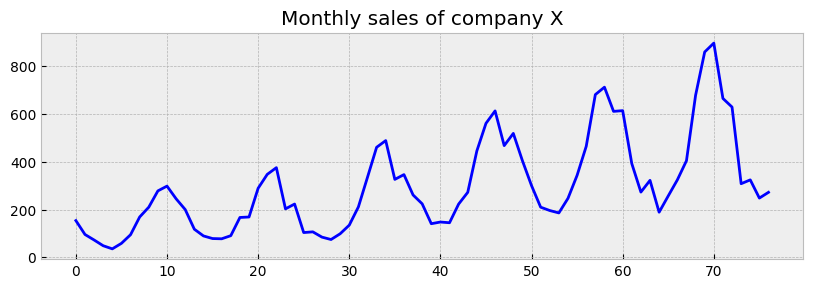

In [ ]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()

In [ ]:
def trajectory(F,N,L):
  K = N - L + 1 # Число колонок в матрице траектории

  X = np.column_stack([F[i:i+L] for i in range(0,K)])
  return X

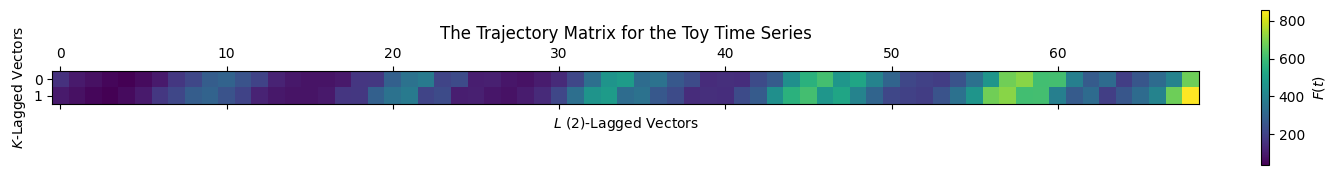

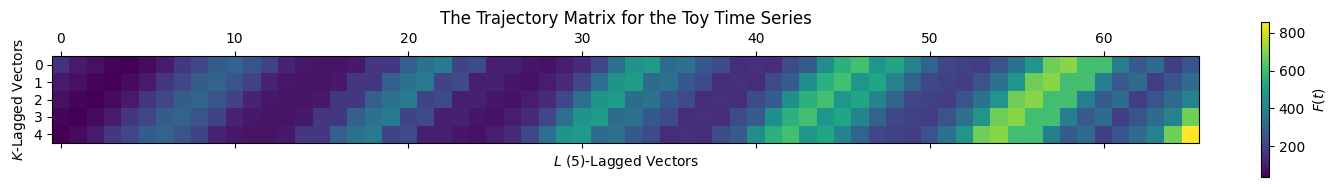

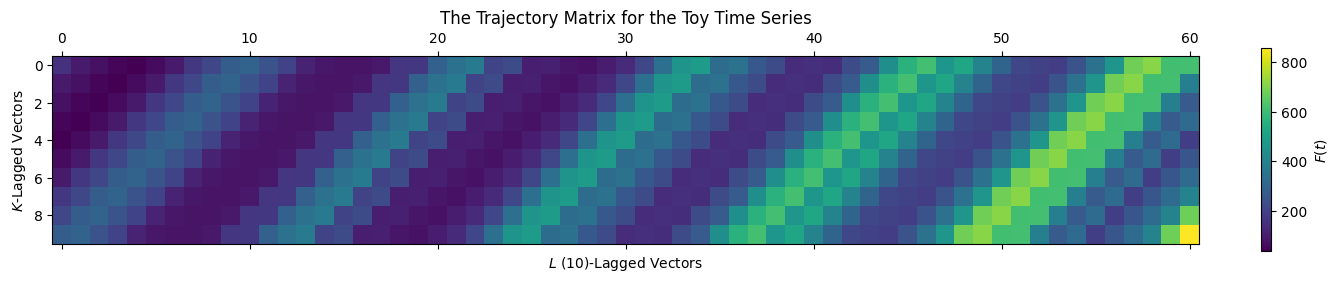

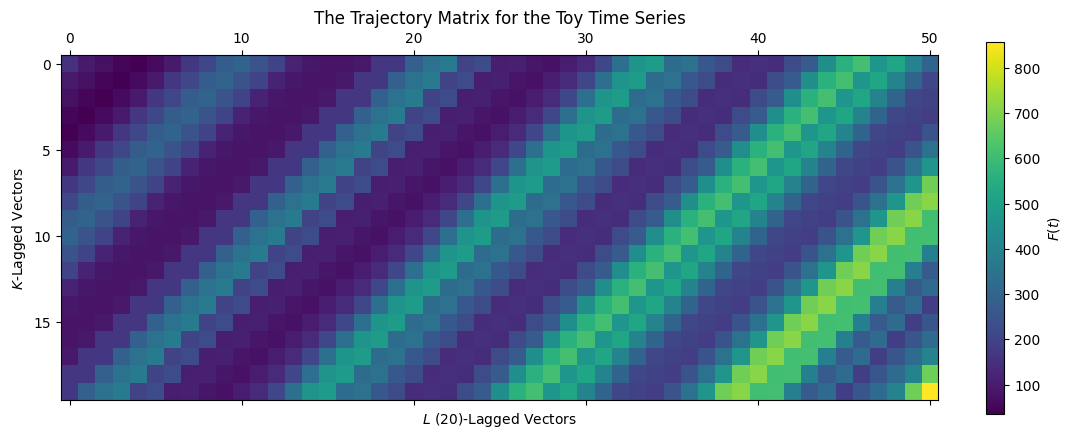

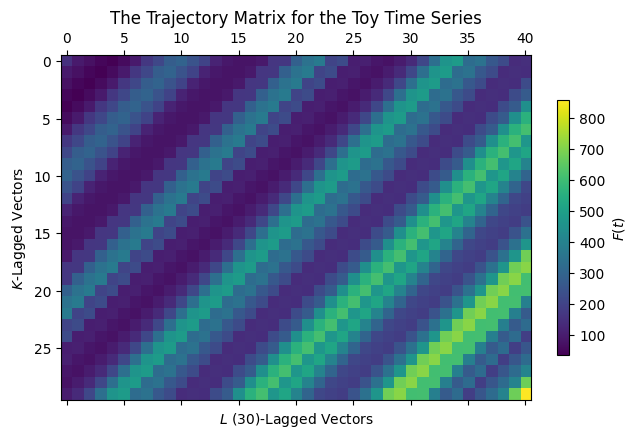

In [ ]:
N = 70
windows = [2,5,10,20,30] #Размеры окон
F = sales_of_company_x['Count']
for L in windows:
  K = N - L + 1 # Число колонок в матрице траектории

  X = np.column_stack([F[i:i+L] for i in range(0,K)])
  # Note: the i+L above gives us up to i+L-1, as numpy array upper bounds are exclusive.
  ax = plt.matshow(X)
  plt.xlabel("$L$ ("+str(L)+")-Lagged Vectors")
  plt.ylabel("$K$-Lagged Vectors")
  plt.colorbar(ax.colorbar, fraction=0.025)
  ax.colorbar.set_label("$F(t)$")
  plt.title("The Trajectory Matrix for the Toy Time Series");

Разложим наш ряд на элементарные матрицы

In [ ]:
def spectral(X,m):
  d = np.linalg.matrix_rank(X)
  U, Sigma, V = np.linalg.svd(X)
  V = V.T
  X_elem = np.array( [Sigma[i] * np.outer(U[:,i], V[:,i]) for i in range(0,d)] )

  if not np.allclose(X, X_elem.sum(axis=0), atol=1e-10):
      print("WARNING: The sum of X's elementary matrices is not equal to X!")
      return ;
  n = min(m, d) # In case d is less than 12 for the toy series. Say, if we were to exclude the noise component...
  for i in range(n):
      plt.subplot(4,4,i+1)
      title = "$\mathbf{X}_{" + str(i) + "}$"
      plot_2d(X_elem[i], title)
  plt.tight_layout()

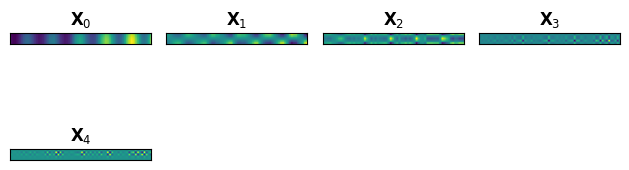

In [ ]:
spectral(trajectory(F,N,5),10)


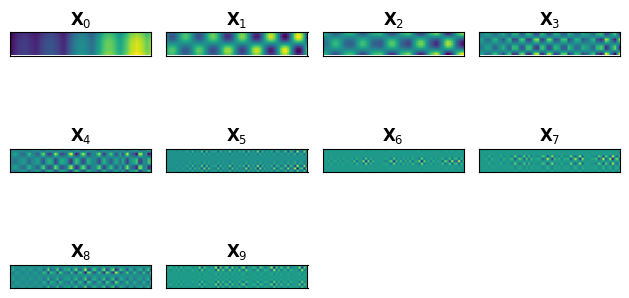

In [ ]:
spectral(trajectory(F,N,10),10)

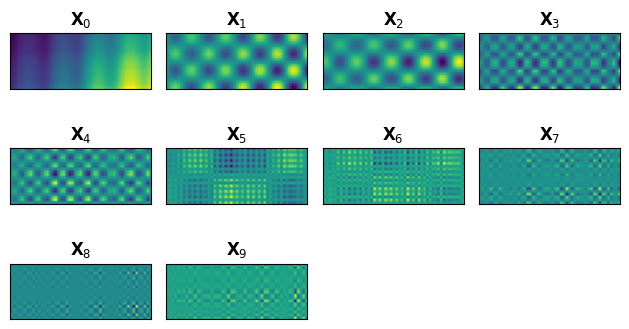

In [ ]:
spectral(trajectory(F,N,20),10)

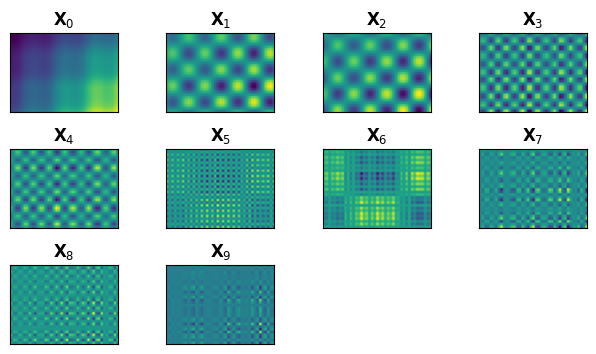

In [ ]:
spectral(trajectory(F,N,30),10)

Ханкелизируем наши ряды


In [ ]:
def spectral_hankelisse(X,m):
  d = np.linalg.matrix_rank(X)
  U, Sigma, V = np.linalg.svd(X)
  V = V.T
  X_elem = np.array( [Sigma[i] * np.outer(U[:,i], V[:,i]) for i in range(0,d)] )
  n = min(d, m)
  for j in range(0,n):
      plt.subplot(4,4,j+1)
      title = r"$\tilde{\mathbf{X}}_{" + str(j) + "}$"
      plot_2d(Hankelise(X_elem[j]), title)
  plt.tight_layout()

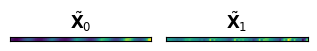

In [ ]:
spectral_hankelisse(trajectory(F,N,2),10)


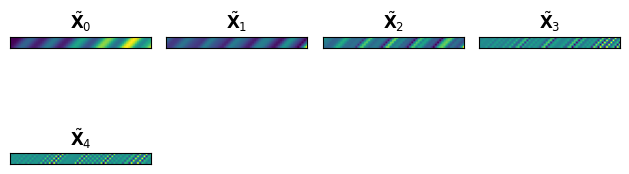

In [ ]:
spectral_hankelisse(trajectory(F,N,5),10)


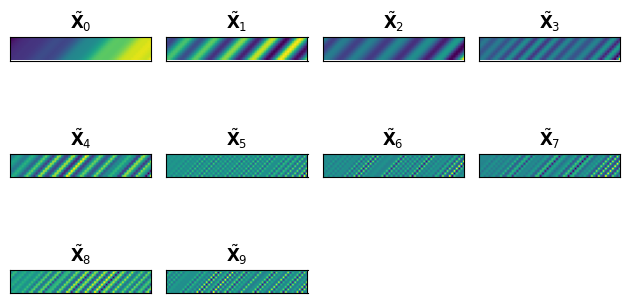

In [ ]:
spectral_hankelisse(trajectory(F,N,10),10)


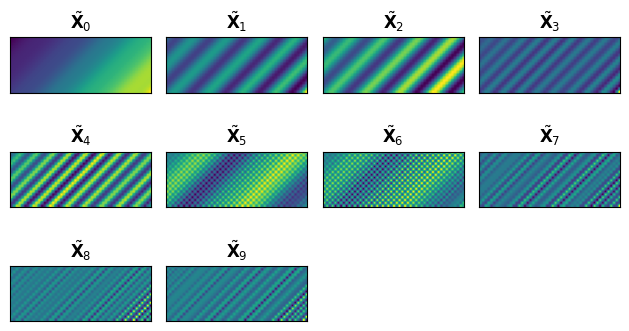

In [ ]:
spectral_hankelisse(trajectory(F,N,20),10)


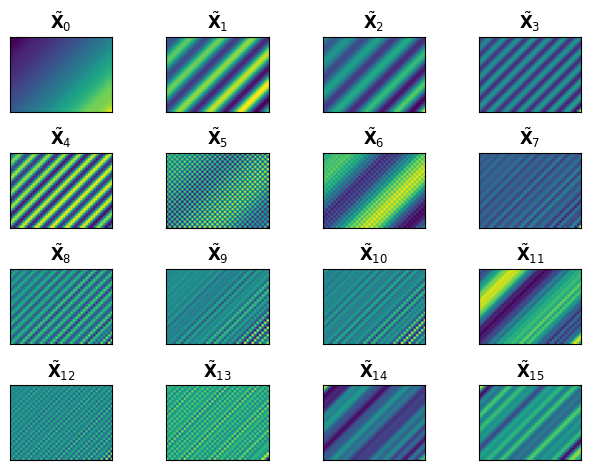

In [ ]:
spectral_hankelisse(trajectory(F,N,30),16)

* Мы видим, что какой то смысл имеют лишь первые 6 рядов,а остальные похожи на шум.
* И лучший результат у нас на окне = 30 , что примерно равно половине анализируемого временного ряда (точная половина была бы 35)

* Матрица x0 похожа на тренд,
x1 , x2, x3,x4,x6 - периодические, притом у x1 и x2 одинаковая частота.
* x7,x8,x9,x10 - тоже похоже на периодические
* У x3 и x4 тоже одинаковая частота
* x7, x8 - тоже периодические с одинаковой частотой.
* x9,x10 -периодические, с одинаковой частотой
* Остальное похоже на шум


In [ ]:
#Построим график первых 10 временных рядов
from cycler import cycler
def X_to_TS(X_i):
    """Averages the anti-diagonals of the given elementary matrix, X_i, and returns a time series."""
    # Reverse the column ordering of X_i
    X_rev = X_i[::-1]
    # Full credit to Mark Tolonen at https://stackoverflow.com/a/6313414 for this one:
    return np.array([X_rev.diagonal(i).mean() for i in range(-X_i.shape[0]+1, X_i.shape[1])])

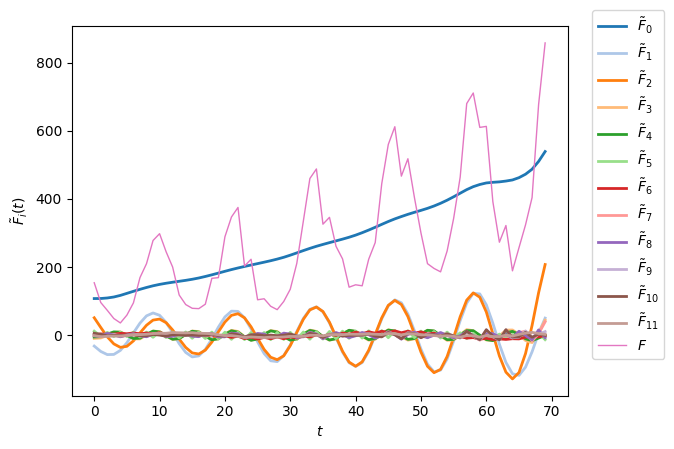

In [ ]:
def pplot(X,moments=70,dmin=12):
  t = np.arange(0,moments) # Moments
  d = np.linalg.matrix_rank(X) # The intrinsic dimensionality of the trajectory space.
  U, Sigma, V = np.linalg.svd(X)
  V = V.T
  X_elem = np.array( [Sigma[i] * np.outer(U[:,i], V[:,i]) for i in range(0,d)] )
  n = min(dmin,d) # In case of noiseless time series with d < 12.

  # Fiddle with colour cycle - need more colours!
  fig = plt.subplot()
  color_cycle = cycler(color=plt.get_cmap('tab20').colors)
  fig.axes.set_prop_cycle(color_cycle)

  # Convert elementary matrices straight to a time series - no need to construct any Hankel matrices.
  for i in range(n):
      F_i = X_to_TS(X_elem[i])
      fig.axes.plot(t, F_i, lw=2)

  fig.axes.plot(t, F[:moments], alpha=1, lw=1)
  fig.set_xlabel("$t$")
  fig.set_ylabel(r"$\tilde{F}_i(t)$")
  legend = [r"$\tilde{F}_{%s}$" %i for i in range(n)] + ["$F$"]

  fig.legend(legend, loc=(1.05,0.1));

pplot(X,70,12)

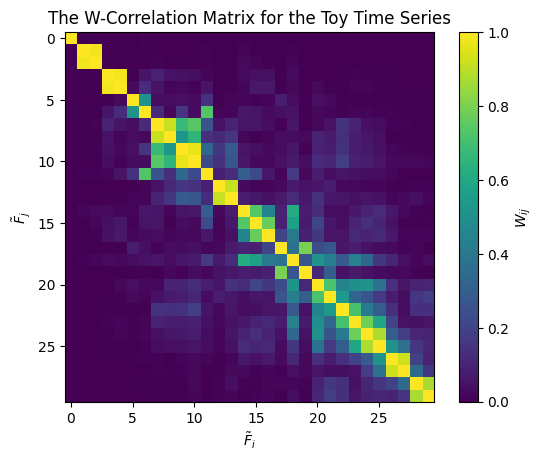

In [ ]:
#Построим матрицу корреляций

def corr(X,L,moments):

  t = np.arange(0,moments) # Moments
  d = np.linalg.matrix_rank(X) # The intrinsic dimensionality of the trajectory space.
  U, Sigma, V = np.linalg.svd(X)
  V = V.T
  X_elem = np.array( [Sigma[i] * np.outer(U[:,i], V[:,i]) for i in range(0,d)] )
  # Get the weights w first, as they'll be reused a lot.
  # Note: list(np.arange(L)+1) returns the sequence 1 to L (first line in definition of w),
  # [L]*(K-L-1) repeats L K-L-1 times (second line in w definition)
  # list(np.arange(L)+1)[::-1] reverses the first list (equivalent to the third line)
  # Add all the lists together and we have our array of weights.
  w = np.array(list(np.arange(L)+1) + [L]*(K-L-1) + list(np.arange(L)+1)[::-1])

  # Get all the components of the toy series, store them as columns in F_elem array.
  F_elem = np.array([X_to_TS(X_elem[i]) for i in range(d)])

  # Calculate the individual weighted norms, ||F_i||_w, first, then take inverse square-root so we don't have to later.
  F_wnorms = np.array([w.dot(F_elem[i]**2) for i in range(d)])
  F_wnorms = F_wnorms**-0.5

  # Calculate the w-corr matrix. The diagonal elements are equal to 1, so we can start with an identity matrix
  # and iterate over all pairs of i's and j's (i != j), noting that Wij = Wji.
  Wcorr = np.identity(d)
  for i in range(d):
      for j in range(i+1,d):
          Wcorr[i,j] = abs(w.dot(F_elem[i]*F_elem[j]) * F_wnorms[i] * F_wnorms[j])
          Wcorr[j,i] = Wcorr[i,j]
  return Wcorr

def corr_plot(Wcorr):
  ax = plt.imshow(Wcorr)
  plt.xlabel(r"$\tilde{F}_i$")
  plt.ylabel(r"$\tilde{F}_j$")
  plt.colorbar(ax.colorbar, fraction=0.045)
  ax.colorbar.set_label("$W_{ij}$")
  plt.clim(0,1)
  plt.title("The W-Correlation Matrix for the Toy Time Series");

wc=corr(X,30,70)
corr_plot(wc)

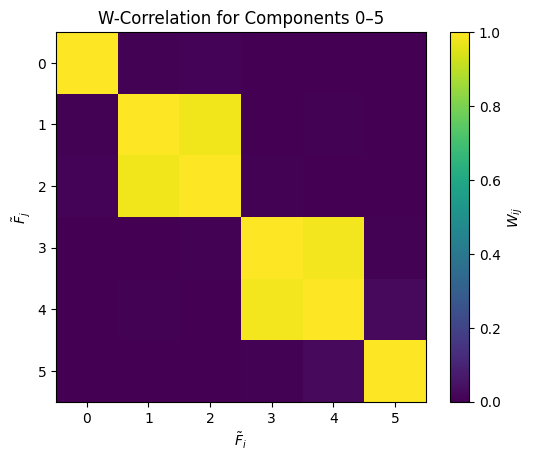

In [ ]:
#Рассмотрим диапазон с наименьшей корреляцией
def corr_plot_lim(Wcorr):
  ax = plt.imshow(Wcorr)
  plt.xlabel(r"$\tilde{F}_i$")
  plt.ylabel(r"$\tilde{F}_j$")
  plt.colorbar(ax.colorbar, fraction=0.045)
  ax.colorbar.set_label("$W_{ij}$")
  plt.xlim(-0.5,5.5)
  plt.ylim(5.5,-0.5)
  plt.clim(0,1)
  plt.title(r"W-Correlation for Components 0–5");

corr_plot_lim(wc)

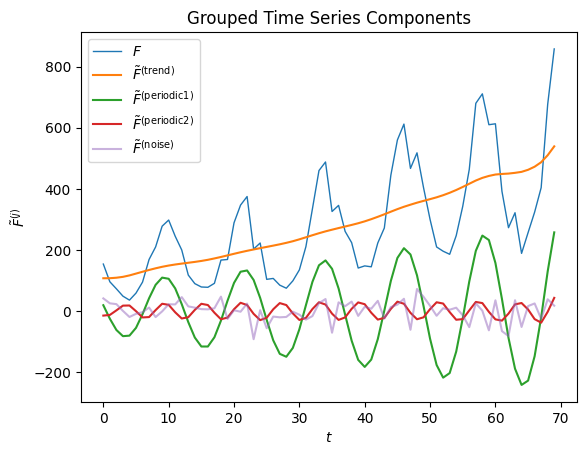

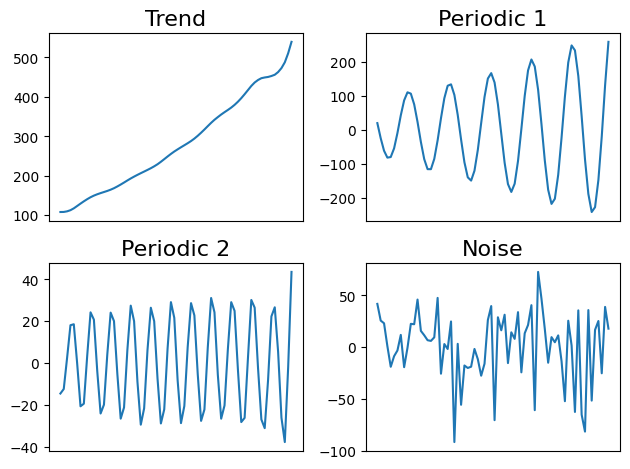

In [ ]:
# И, наконец, нарисуем наши найденные 5 компонентов отдельно
t = np.arange(0,70) # Moments
d = np.linalg.matrix_rank(X) # The intrinsic dimensionality of the trajectory space.
U, Sigma, V = np.linalg.svd(X)
V = V.T
X_elem = np.array( [Sigma[i] * np.outer(U[:,i], V[:,i]) for i in range(0,d)] )
# Assemble the grouped components of the time series.
F_trend = X_to_TS(X_elem[[0]].sum(axis=0))
F_periodic1 = X_to_TS(X_elem[[1,2]].sum(axis=0))
F_periodic2 = X_to_TS(X_elem[[3,4]].sum(axis=0))
F_noise = X_to_TS(X_elem[5:].sum(axis=0))

# Plot the toy time series and its separated components on a single plot.
plt.plot(t,F[:70], lw=1)
plt.plot(t, F_trend)
plt.plot(t, F_periodic1)
plt.plot(t, F_periodic2)
plt.plot(t, F_noise, alpha=0.5)
plt.xlabel("$t$")
plt.ylabel(r"$\tilde{F}^{(j)}$")
groups = ["trend", "periodic 1", "periodic 2", "noise"]
legend = ["$F$"] + [r"$\tilde{F}^{(\mathrm{%s})}$"%group for group in groups]
plt.legend(legend)
plt.title("Grouped Time Series Components")
plt.show()

# A list of tuples so we can create the next plot with a loop.
components = [("Trend", F_trend),
              ("Periodic 1", F_periodic1),
              ("Periodic 2", F_periodic2),
              ("Noise",  F_noise)]

# Plot the separated components and original components together.
fig = plt.figure()
n=1
for name, ssa_comp in components:
    ax = fig.add_subplot(2,2,n)

    ax.plot(t, ssa_comp)
    ax.set_title(name, fontsize=16)
    ax.set_xticks([])
    n += 1

fig.tight_layout()

Как итог, мы провели спектральное разложение временного ряда на компоненты.